# 作業

- 作業目標 : iris (dataset.load_iris()) 資料嘗試跑 kmeans (可以測試不同的群數 , init 等)

In [28]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

# Set seed number to ensure random number generation deliver the same output.
np.random.seed(5)

# Create iris data set
iris = datasets.load_iris()
X = iris.data
y = iris.target

#print (X)
#print (y)

### 載入 相關套件 並 執行 kmean 實驗 ...

- 實驗測試不同的群數
- 實驗測試不同的初始值
- 呈現結果

In [29]:
# Configure the parameter settings for model, experient n_init=1,2,3,(3,2,1)
estimators = [('k_means_5', KMeans(n_clusters=5, n_init=3)),
              ('k_means_4', KMeans(n_clusters=4, n_init=2)),
              ('k_means_3', KMeans(n_clusters=3, n_init=1))]
           #   ('k_means_bad_init', KMeans(n_clusters=3, n_init=1, init='random'))]

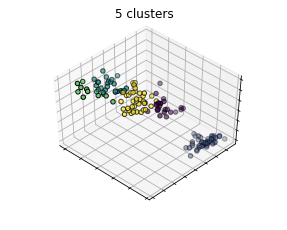

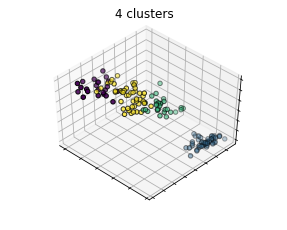

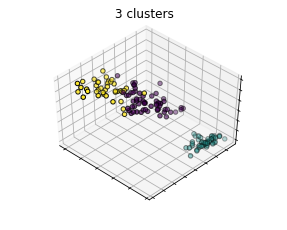

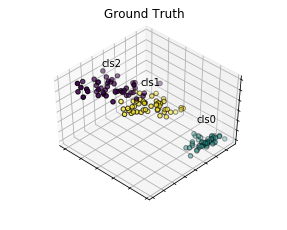

In [30]:
fignum = 1
titles = ['5 clusters', '4 clusters', '3 clusters']

# Loop through the settings of estimators
for name, est in estimators:
    # Set the size of plots
    fig = plt.figure(fignum, figsize=(4, 3))
    
    # Set the dimention of 3D graph
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    
    ## fit data
    est.fit(X)
    # Extract lables of estimators
    labels = est.labels_
    # Plot 3D scatter chart
    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    
    ax.set_title(titles[fignum - 1])
    
    # Set the distance of the eye viewing point from the object point.
    # If it is too near, we cannot tell the grouping clearly.
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('cls0', 0),
                    ('cls1', 1),
                    ('cls2', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
    
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
# Set the distance of the eye viewing point from the object point.
# If it is too near, we cannot tell the grouping clearly.
ax.dist = 12


3 cluster groups appears to be the optimum cluster numbers.
Different init value for kmeans seems not chaning much.